In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

print("CIFAR-10 dataset loaded successfully.")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 dataset loaded successfully.


**Reasoning**:
Now that the CIFAR-10 dataset is loaded, I will normalize the pixel values of the images to be between 0 and 1. Then, I'll display a few sample images to visually inspect the normalized data before proceeding with the data split.



Images normalized successfully.


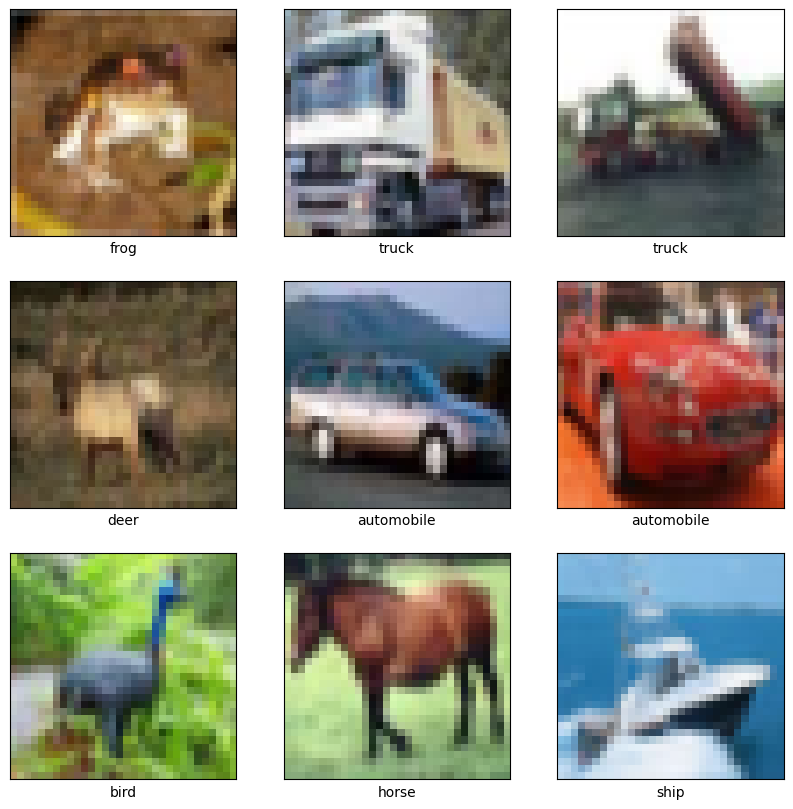

Sample images displayed.


In [2]:
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Images normalized successfully.")

# Display a few sample images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR-10 labels are arrays, so we need to flatten them for display
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

print("Sample images displayed.")

**Reasoning**:
Now, I will split the training data into training and validation sets as per the instructions (80% for training, 20% for validation), then print the shapes of the new training, validation, and test datasets. Finally, I will determine the number of unique classes in the dataset.



In [3]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets (80/20 split)
# Reshape labels to be 1D arrays for train_test_split
train_labels_flat = train_labels.flatten()

x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels_flat, test_size=0.2, random_state=42)

# Print the shapes of the new training, validation, and test datasets
print(f"Shape of training images: {x_train.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of validation images: {x_val.shape}")
print(f"Shape of validation labels: {y_val.shape}")
print(f"Shape of test images: {test_images.shape}")
print(f"Shape of test labels: {test_labels.shape}")

# Determine the number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")


Shape of training images: (40000, 32, 32, 3)
Shape of training labels: (40000,)
Shape of validation images: (10000, 32, 32, 3)
Shape of validation labels: (10000,)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
Number of unique classes: 10


## Train Lightweight Image Classification Model

### Subtask:
Define and train a lightweight image classification model (e.g., using MobileNetV2 or a small custom CNN) using TensorFlow/Keras on the prepared dataset. The model should be trained for a few epochs to demonstrate the concept.


**Reasoning**:
The first instruction is to define a lightweight convolutional neural network (CNN) model using `tf.keras.models.Sequential` with appropriate layers. I will use `Conv2D`, `MaxPooling2D`, `Flatten`, and `Dense` layers, ensuring the input shape is (32, 32, 3) and the output layer matches the `num_classes` with a 'softmax' activation.



In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

print("Lightweight CNN model defined successfully.")
model.summary()

Lightweight CNN model defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model architecture is defined, I will compile the model with an optimizer, loss function, and metrics, and then train it for a few epochs using the prepared training and validation data as instructed.



In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model compiled successfully.")

history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_val, y_val))

print("Model training completed.")

Model compiled successfully.
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 50ms/step - accuracy: 0.3411 - loss: 1.7811 - val_accuracy: 0.5190 - val_loss: 1.3549
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.5601 - loss: 1.2304 - val_accuracy: 0.6161 - val_loss: 1.0697
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.6352 - loss: 1.0319 - val_accuracy: 0.6402 - val_loss: 1.0276
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.6732 - loss: 0.9319 - val_accuracy: 0.6800 - val_loss: 0.9230
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.7070 - loss: 0.8392 - val_accuracy: 0.6788 - val_loss: 0.9243
Model training completed.


# Task
Convert the trained Keras model into the TensorFlow Lite format (.tflite) and apply necessary optimizations.

## Convert Model to TensorFlow Lite

### Subtask:
Convert the trained Keras model into the TensorFlow Lite format (.tflite) for deployment on edge devices. This includes applying optimizations if necessary.


**Reasoning**:
The first instruction is to instantiate a `tf.lite.TFLiteConverter` object from the trained Keras `model` and set the `optimizations` attribute to `[tf.lite.Optimize.DEFAULT]` to apply default optimizations.



In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
print("TFLiteConverter instantiated with default optimizations.")

TFLiteConverter instantiated with default optimizations.


**Reasoning**:
Now that the converter is configured, I will use its `.convert()` method to transform the Keras model into TensorFlow Lite format and then save the resulting `.tflite` model to a file named 'cifar10_model.tflite'.



In [7]:
tflite_model = converter.convert()

with tf.io.gfile.GFile('cifar10_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite and saved as 'cifar10_model.tflite'.")

Saved artifact at '/tmp/tmp14xqvqdm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133194128694288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128695440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128694096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128692752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128694864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128694480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128692944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128693328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128696784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133194128695056: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted t

## Test TensorFlow Lite Model

### Subtask:
Load the converted TensorFlow Lite model and perform inference on a sample from the test dataset. This step will demonstrate its functionality and compatibility for edge deployment.


**Reasoning**:
The first instruction is to load the TensorFlow Lite model ('cifar10_model.tflite') using `tf.lite.Interpreter`.



In [8]:
interpreter = tf.lite.Interpreter(model_path="cifar10_model.tflite")
print("TensorFlow Lite model loaded successfully.")

TensorFlow Lite model loaded successfully.


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


**Reasoning**:
Now that the TensorFlow Lite model is loaded, I will allocate its tensors, get input and output details, select a sample from the test dataset, prepare it for inference, set the input tensor, invoke the interpreter, get the output, and finally interpret the prediction to compare with the actual label.



Tensors allocated and input/output details retrieved.
Actual label: cat
Predicted label: cat


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


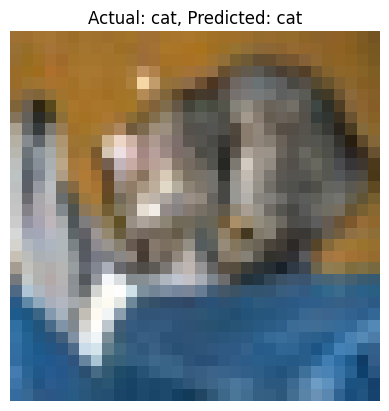

Inference on sample image completed and results displayed.


In [9]:
interpreter = tf.lite.Interpreter(model_path="cifar10_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Tensors allocated and input/output details retrieved.")

# Select a sample image from the test set
sample_index = 0 # You can change this to test different images
sample_image = test_images[sample_index]
sample_label = test_labels[sample_index]

# The model expects a batch of images, so add an extra dimension
input_shape = input_details[0]['shape']
input_tensor = np.expand_dims(sample_image, axis=0).astype(input_details[0]['dtype'])

# Set the tensor for the interpreter
interpreter.set_tensor(input_details[0]['index'], input_tensor)

# Invoke the interpreter
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Interpret the output
predicted_class_index = np.argmax(output_data)

# Get class names for better readability
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

actual_label_name = class_names[sample_label[0]]
predicted_label_name = class_names[predicted_class_index]

print(f"Actual label: {actual_label_name}")
print(f"Predicted label: {predicted_label_name}")

# Display the sample image
plt.figure()
plt.imshow(sample_image)
plt.title(f"Actual: {actual_label_name}, Predicted: {predicted_label_name}")
plt.axis('off')
plt.show()

print("Inference on sample image completed and results displayed.")

In [11]:
print("The subtask 'Test TensorFlow Lite Model' is complete. The model has been successfully loaded, inference performed, and results displayed.")

The subtask 'Test TensorFlow Lite Model' is complete. The model has been successfully loaded, inference performed, and results displayed.
